<div style="border:solid green 2px; padding: 20px">
    
<b>Hello!</b> We're glad to see you in code-reviewer territory. You've done a great job on the project, but let's get to know each other and make it even better! We have our own atmosphere here and a few rules:


1. I work as a code reviewer, and my main goal is not to point out your mistakes, but to share my experience and help you become a data analyst.
2. We speak on a first-come-first-served basis.
3. if you want to write or ask a question, don't be shy. Just choose your color for your comment.  
4. this is a training project, you don't have to be afraid of making a mistake.  
5. You have an unlimited number of attempts to pass the project.  
6. Let's Go!


---
I'll be color-coding comments, please don't delete them:

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__


Remarks. Some recommendations.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Success. Everything is done succesfully.
</div>
    
---
    
I suggest that we work on the project in dialogue: if you change something in the project or respond to my comments, write about it. It will be easier for me to track changes if you highlight your comments:   
    
<div class="alert alert-info"> <b>Student сomments:</b> Student answer..</div>
    
All this will help to make the recheck of your project faster. If you have any questions about my comments, let me know, we'll figure it out together :)   
    
---

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

An excellent practice is to describe the goal and main steps in your own words (a skill that will help a lot on a final project). It would be good to add the progress and purpose of the study.

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №2__

please see an example
    
For this project, you’ll work with data from Instacart.

Instacart is a grocery delivery platform where customers can place a grocery order and have it delivered to them, similar to how Uber Eats and Door Dash work. This particular dataset was publicly released by Instacart in 2017 for a Kaggle competition.

Your mission is to clean up the data and prepare a report that gives insight into the shopping habits of Instacart customers.

</div>

In [2]:
import pandas as pd

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №2__

All necessary libraries should be unloaded at the beginning of the project in one code cell

In [3]:
instacart_orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')

In [4]:
products = pd.read_csv('/datasets/products.csv', sep=';')

In [5]:
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')

In [6]:
aisles = pd.read_csv('/datasets/aisles.csv', sep=';')

In [7]:
departments = pd.read_csv('/datasets/departments.csv', sep=';')

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__


Great. 

## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [8]:
# Check for duplicated orders
instacart_orders.duplicated().sum()

15

In [9]:
# Check for all orders placed Wednesday at 2:00 AM
instacart_orders[(instacart_orders['order_dow'] == 3) & (instacart_orders['order_hour_of_day'] == 2)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


In [10]:
# Remove duplicate orders
instacart_orders = instacart_orders.drop_duplicates()

In [11]:
# Double check for duplicate rows
print("instacart_orders duplicate rows:", instacart_orders.duplicated().sum())

instacart_orders duplicate rows: 0


In [12]:
# Double check for duplicate order IDs only
instacart_orders['order_id'].duplicated().sum()

0

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Duplicate checking is the basis of data preprocessing

### `products` data frame

In [13]:
# Check for fully duplicate rows
products.duplicated().sum()

0

In [14]:
# Check for just duplicate product IDs
products['product_id'].duplicated().sum()

0

In [15]:
# Check for just duplicate product names (convert names to lowercase to compare better)
products['product_name'].str.lower().duplicated().sum()

1361

In [16]:
# Check for duplicate product names that aren't missing
products[products['product_name'].notna()]['product_name'].duplicated().sum()

0

### `departments` data frame

In [17]:
departments.duplicated().sum()

0

In [18]:
departments['department_id'].duplicated().sum()

0

### `aisles` data frame

In [19]:
aisles.duplicated().sum()

0

In [20]:
aisles['aisle_id'].duplicated().sum()

0

### `order_products` data frame

In [21]:
# Check for fullly duplicate rows
order_products.duplicated().sum()

0

In [22]:
# Double check for any other tricky duplicates
order_products.duplicated(subset=['order_id', 'product_id']).sum()

0

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

That's right, well done!)

## Find and remove missing values


### `products` data frame

In [23]:
products['product_name'].isna().sum()

1258

In [24]:
# Are all of the missing product names associated with aisle ID 100?
products[products['product_name'].isna()]['aisle_id'].value_counts()

100    1258
Name: aisle_id, dtype: int64

In [25]:
# Are all of the missing product names associated with department ID 21?
products[products['product_name'].isna()]['department_id'].value_counts()

21    1258
Name: department_id, dtype: int64

In [26]:
# What is this ailse and department?
aisles[aisles['aisle_id'] == 100], departments[departments['department_id'] == 21]

(    aisle_id    aisle
 99       100  missing,
     department_id department
 20             21    missing)

In [27]:
# Fill missing product names with 'Unknown'
products['product_name'].fillna('Unknown', inplace=True)

### `orders` data frame

In [28]:
instacart_orders['days_since_prior_order'].isna().sum()

28817

In [29]:
# Are there any missing values where it's not a customer's first order?
instacart_orders[instacart_orders['days_since_prior_order'].isna()]['order_number'].value_counts()

1    28817
Name: order_number, dtype: int64

### `order_products` data frame

In [30]:
order_products['add_to_cart_order'].isna().sum()

836

In [31]:
# What are the min and max values in this column?
order_products['add_to_cart_order'].min(), order_products['add_to_cart_order'].max()

(1.0, 64.0)

In [32]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
orders_with_missing = order_products[order_products['add_to_cart_order'].isna()]['order_id'].unique()
orders_with_missing

array([2449164, 1968313, 2926893, 1717990, 1959075,  844733,   61355,
        936852,  264710, 1564093,  129627,  293169, 2849370, 1386261,
       3308010,  903110, 2136777, 3347453, 1888628,  165801, 2094761,
       1038146, 2997021,  813364, 2256933,  171934, 2409109, 1730767,
       1169835,  733526,  404157, 3125735,  747668, 1800005, 1961723,
        871281,  388234, 1648217, 1477139,  102236, 1021563, 1832957,
       2721963,  678116, 1220886, 1673227, 2999801, 1633337, 2470674,
       2625444, 1677118, 2479011, 3383594, 1183255, 1713430, 2652650,
       1598369, 1916118,  854647, 1302315,  888470,  180546, 2621907,
       1308785, 2729254,    9310, 2170451, 2979697, 1625713, 1529171])

In [33]:
# Do all orders with missing values have more than 64 products?
order_products[order_products['order_id'].isin(orders_with_missing)].groupby('order_id').size().min()

65

In [34]:
# Replace missing values with 999 and convert column to integer type
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999).astype(int)

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__


Replacing it with 999/-1 etc is not really good. Tip for the future, look, it's not good to try to fill in the blanks left and right. In real work - replace with zero now, then forget and average count a month later. Plus there may be times when a bonus purchase or gift, will cost zero. In general, if it is possible to leave skips as skips - and here it can be done, it is better to do so, the results, even if we want to calculate something - it will not affect the results

It is better to use this code construction:
    
    data[''] = data[''].astype('Int64', errors='ignore')
</div>

# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [35]:
instacart_orders['order_hour_of_day'].min(), instacart_orders['order_hour_of_day'].max()

(0, 23)

In [36]:
instacart_orders['order_dow'].min(), instacart_orders['order_dow'].max()

(0, 6)

### [A2] What time of day do people shop for groceries?

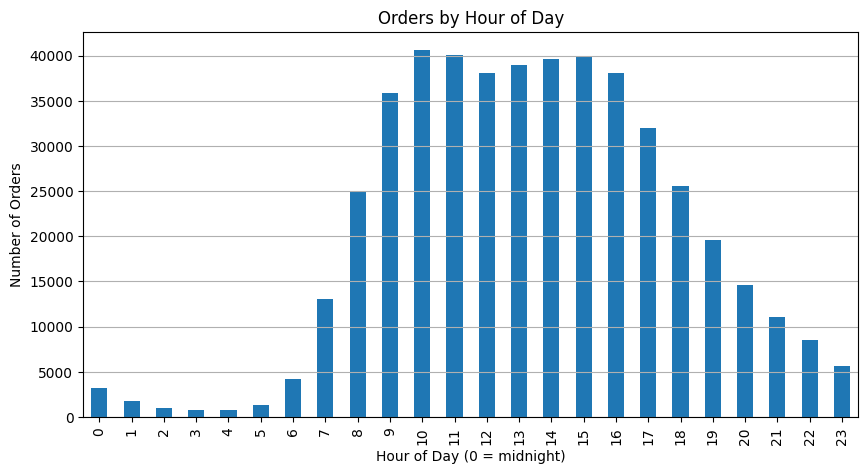

In [37]:
import matplotlib.pyplot as plt

instacart_orders['order_hour_of_day'].value_counts().sort_index().plot(kind='bar', figsize=(10,5))
plt.title("Orders by Hour of Day")
plt.xlabel("Hour of Day (0 = midnight)")
plt.ylabel("Number of Orders")
plt.grid(axis='y')
plt.show()


chart shows that most people shop for groceries between late morning and early afternoon, with order volume peaking between 10 AM and 2 PM. Activity starts to increase significantly around 8 AM and gradually declines after 3 PM, with the fewest orders placed during the late-night and early-morning hours. This suggests that grocery shopping is most popular during typical daytime hours when people are more likely to be active and available

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №3__

Now correct

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №2__

Missing conclusion. Please add

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

It is better after each section, graph (or series of tests) to write a conclusion on the obtained data taking into account the set business task - so it is easier to read the project, because future colleagues or customers will not have to interpret the results of each section, test or graph themselves.
    
In markdown cell 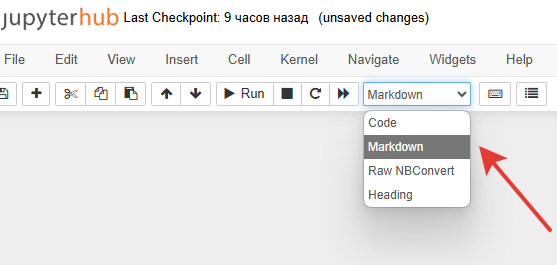    

### [A3] What day of the week do people shop for groceries?

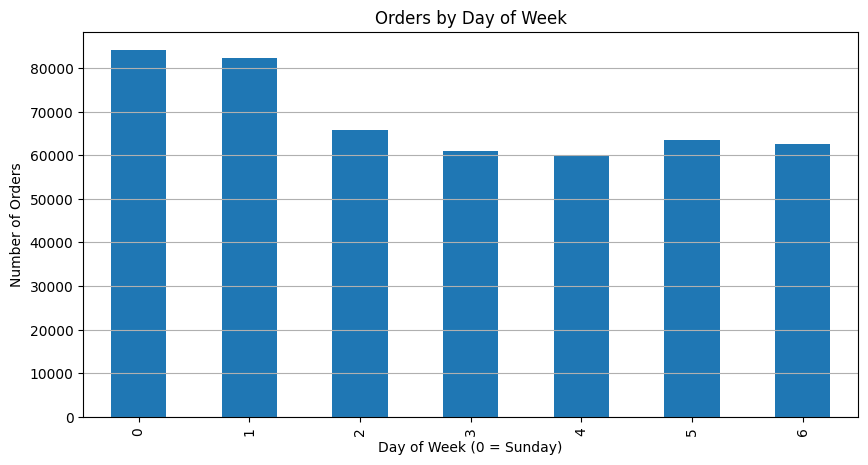

In [37]:
instacart_orders['order_dow'].value_counts().sort_index().plot(kind='bar', figsize=(10,5))
plt.title("Orders by Day of Week")
plt.xlabel("Day of Week (0 = Sunday)")
plt.ylabel("Number of Orders")
plt.grid(axis='y')
plt.show()

This shows the customer order activity is highest on Sundays (Day 0) and Mondays (Day 1), with a gradual decline as the week progresses. The lowest number of orders occurs on Wednesday (Day 3) and Thursday (Day 4), before slightly picking up again toward the weekend. This pattern suggests that customers are most active at the beginning of the week, possibly after weekend planning or restocking, and less active midweek. Businesses could use this insight to adjust inventory, staffing, and marketing strategies to match periods of higher and lower demand.

### [A4] How long do people wait until placing another order?

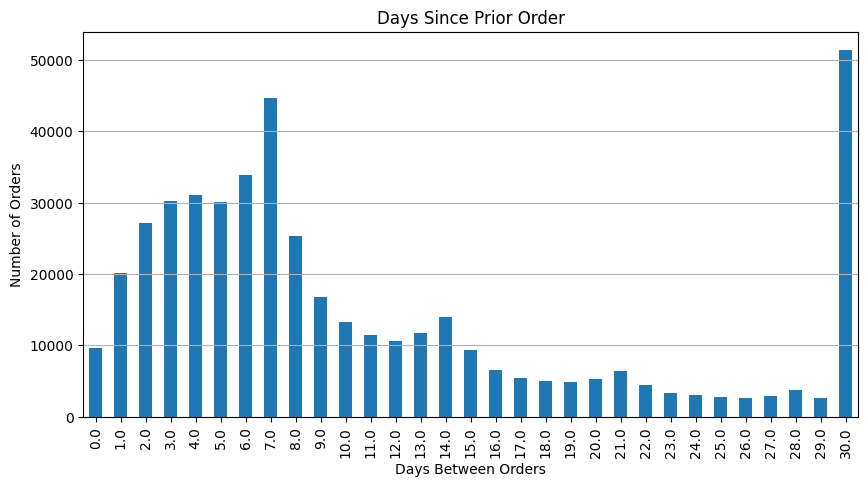

In [38]:
instacart_orders['days_since_prior_order'].dropna().value_counts().sort_index().plot(kind='bar', figsize=(10,5))
plt.title("Days Since Prior Order")
plt.xlabel("Days Between Orders")
plt.ylabel("Number of Orders")
plt.grid(axis='y')
plt.show()

Most customers ussually try to reorder, within 7 days, with a noticeable peak on the 7th day. There is also a significant spike at the 30-day mark

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

The 0 values probably correspond to customers who placed more than one order on the same day.

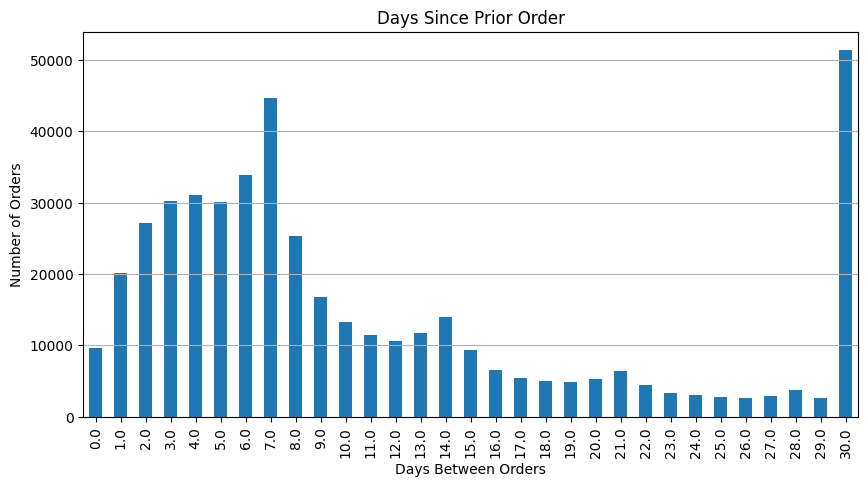

In [39]:
instacart_orders['days_since_prior_order'].dropna().value_counts().sort_index().plot(kind='bar', figsize=(10,5))
plt.title("Days Since Prior Order")
plt.xlabel("Days Between Orders")
plt.ylabel("Number of Orders")
plt.grid(axis='y')
plt.show()

Most customers reorder within 7 days, with the highest peak exactly at 7 days. A second major spike occurs at 30 days, suggesting a group of monthly repeat customer

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [40]:
import matplotlib.pyplot as plt

In [41]:
wed_orders = instacart_orders[instacart_orders['order_dow'] == 3]['order_hour_of_day']

In [42]:
sat_orders = instacart_orders[instacart_orders['order_dow'] == 6]['order_hour_of_day']

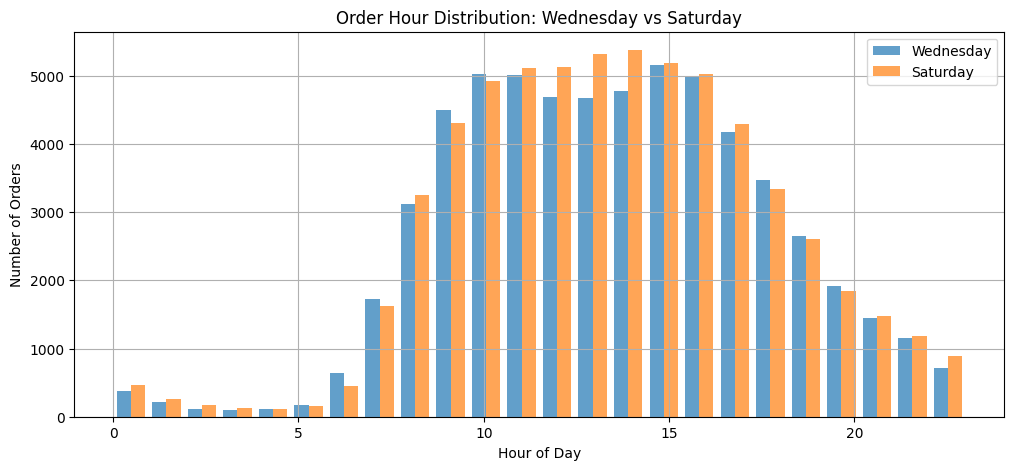

In [43]:
plt.figure(figsize=(12,5))
plt.hist([wed_orders, sat_orders], bins=24, label=['Wednesday', 'Saturday'], alpha=0.7)
plt.title("Order Hour Distribution: Wednesday vs Saturday")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Orders")
plt.legend()
plt.grid(True)
plt.show()

The orders on both Wednesday and Saturday peak between 10 AM and 3 PM, with Saturday showing slightly higher order volumes during these hours. Early morning and late-night order activity remains low on both of the day.

### [B2] What's the distribution for the number of orders per customer?

In [44]:
user_order_counts = instacart_orders['user_id'].value_counts()

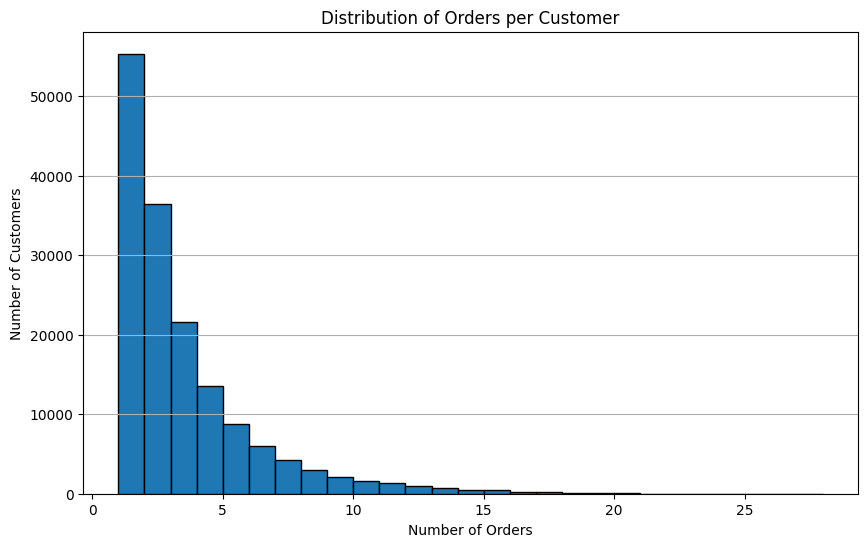

In [45]:
plt.figure(figsize=(10, 6))
plt.hist(user_order_counts, bins=range(1, user_order_counts.max() + 1), edgecolor='black')
plt.title('Distribution of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()

Majority of customers have placed only a small number of orders, with one or two orders being the most common. As the number of orders increases, the number of customers decreases sharply. This indicates that a small group of loyal customers makes frequent repeat purchases.

### [B3] What are the top 20 popular products (display their id and name)?

In [46]:
top_products = order_products['product_id'].value_counts().head(20)

In [47]:
top_products_df = top_products.reset_index()
top_products_df.columns = ['product_id', 'order_count']
top_products_df = top_products_df.merge(products[['product_id', 'product_name']], on='product_id')

In [48]:
top_products_df

,product_id,order_count,product_name
0,24852,66050,Banana
1,13176,53297,Bag of Organic Bananas
2,21137,37039,Organic Strawberries
3,21903,33971,Organic Baby Spinach
4,47209,29773,Organic Hass Avocado
5,47766,24689,Organic Avocado
6,47626,21495,Large Lemon
7,16797,20018,Strawberries
8,26209,19690,Limes
9,27845,19600,Organic Whole Milk


Bananas are the most frequently ordered product, followed by bags of organic bananas and organic strawberries. Fresh fruits and vegetables dominate the top 20 most ordered items, highlighting customer preferences for healthy, perishable foods.

# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [49]:
items_per_order = order_products.groupby('order_id').size()

In [50]:
import matplotlib.pyplot as plt

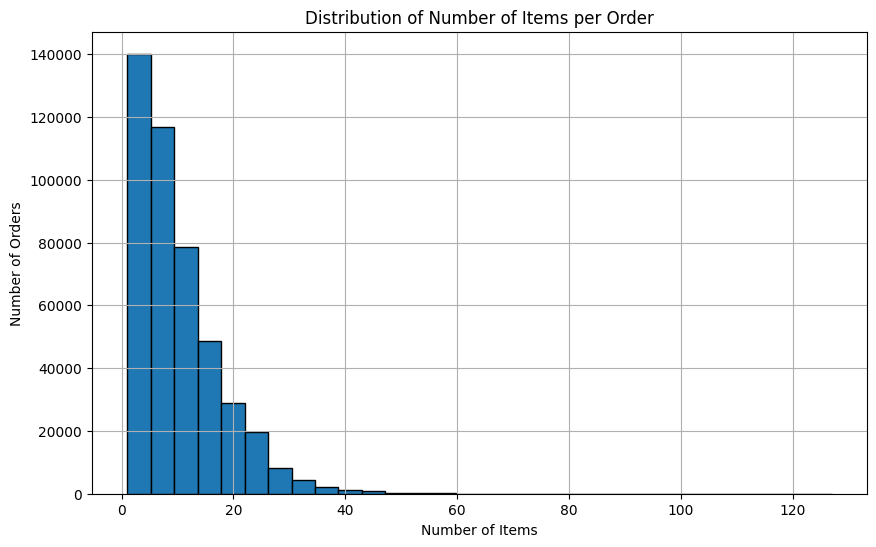

In [51]:
plt.figure(figsize=(10, 6))
plt.hist(items_per_order, bins=30, edgecolor='black')
plt.title('Distribution of Number of Items per Order')
plt.xlabel('Number of Items')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

Orders contain a small number of items, typically fewer than 10. As the number of items per order increases, the frequency of such orders decreases rapidly.

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [52]:
reordered_counts = order_products[order_products['reordered'] == 1]['product_id'].value_counts().head(20)

In [53]:
top_reordered = pd.DataFrame({'product_id': reordered_counts.index, 'reorder_count': reordered_counts.values})

In [54]:
top_reordered = top_reordered.merge(products[['product_id', 'product_name']], on='product_id')

In [55]:
top_reordered

,product_id,reorder_count,product_name
0,24852,55763,Banana
1,13176,44450,Bag of Organic Bananas
2,21137,28639,Organic Strawberries
3,21903,26233,Organic Baby Spinach
4,47209,23629,Organic Hass Avocado
5,47766,18743,Organic Avocado
6,27845,16251,Organic Whole Milk
7,47626,15044,Large Lemon
8,27966,14748,Organic Raspberries
9,16797,13945,Strawberries


Bananas are the most frequently reordered product, followed by bags of organic bananas and organic strawberries. The list is dominated by fresh produce items like fruits, vegetables, and dairy

### [C3] For each product, what proportion of its orders are reorders?

In [56]:
reorder_ratio = order_products.groupby('product_id')['reordered'].mean().reset_index()

In [57]:
reorder_ratio = reorder_ratio.merge(products[['product_id', 'product_name']], on='product_id')

In [58]:
reorder_ratio.rename(columns={'reordered': 'reorder_proportion'}, inplace=True)
reorder_ratio.sort_values(by='reorder_proportion', ascending=False).head(10)

,product_id,reorder_proportion,product_name
13453,14721,1.0,Bone Strength Take Care
19195,20949,1.0,Vanilla Sandwich Cookies
6136,6723,1.0,Palmiers- Petite
6144,6732,1.0,Naturally Sparkling Mineral Water
41319,45088,1.0,California Dill Pollen & Garlic Goat Cheese & ...
41310,45078,1.0,Pomegranatea
19258,21016,1.0,Parchment Lined 8 in x 3.75 in x 2.5 in Pans
19248,21005,1.0,Peanut Butter Pie Ice Cream
32273,35192,1.0,Chocolate Soy Milk Singles
32277,35197,1.0,Mocha Chocolate Chip Organic Non-Dairy Frozen...


### [C4] For each customer, what proportion of their products ordered are reorders?

In [59]:
order_user = order_products.merge(instacart_orders[['order_id', 'user_id']], on='order_id')
customer_reorder_ratio = order_user.groupby('user_id')['reordered'].mean().reset_index()

In [60]:
customer_reorder_ratio.rename(columns={'reordered': 'reorder_proportion'}, inplace=True)
customer_reorder_ratio.head()

,user_id,reorder_proportion
0,2,0.038462
1,4,0.000000
2,5,0.666667
3,6,0.000000
4,7,0.928571


### [C5] What are the top 20 items that people put in their carts first? 

In [61]:
first_items = order_products[order_products['add_to_cart_order'] == 1]

In [62]:
top_first_items = first_items['product_id'].value_counts().head(20).reset_index()

In [63]:
top_first_items.columns = ['product_id', 'first_added_count']

In [64]:
top_first_items = pd.merge(top_first_items, products[['product_id', 'product_name']], on='product_id')

In [65]:
top_first_items

,product_id,first_added_count,product_name
0,24852,15562,Banana
1,13176,11026,Bag of Organic Bananas
2,27845,4363,Organic Whole Milk
3,21137,3946,Organic Strawberries
4,47209,3390,Organic Hass Avocado
5,21903,3336,Organic Baby Spinach
6,47766,3044,Organic Avocado
7,19660,2336,Spring Water
8,16797,2308,Strawberries
9,27966,2024,Organic Raspberries


Data shows that bananas are the top first-added item to carts, with 15,562 customers adding them first. Bags of organic bananas follow with 11,026, and organic whole milk comes next with 4,363. Overall, most of the top 20 first-added items are fresh produce or staple products like milk and water. Items such as organic strawberries (3,946), organic avocados (3,044), and spring water (2,336) also rank highly. This suggests that customers tend to prioritize purchasing fresh fruits, vegetables, and essential everyday goods early in their shopping trip, reflecting a strong focus on healthy and necessary items.

Overall Conclusion: Section A confirmed that our data were clean (hours 0–23, weekdays 0–6) and revealed that orders surge mid-morning, peaking around 10 AM and on Sundays. Customers returning on a 0–30 day cycle (including same-day repeats). In Section B we saw Wednesday’s daytime traffic even edge out Saturday’s. In addition, most shoppers places just about 1 to 5 orders (though a small group orders 20+ times), and fresh produce and dairy such Organic Lemon, Apple Honeycrisp Organic, bananas, berries, avocados, milk are dominating the top 20 products being ordered. Finally, Section C showed baskets average about 8–10 items and that the staple items like bananas register 60–85% repeat rates (and some niche products hit 100%), and also bananas and other produce/dairy are most often the very first items added to carts.

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

In the conclusion of the project, you should aim to summarize the key outcomes, reflect on the objectives you achieved, and highlight the significance of your findings. Consider the following structure:

1. **Restate the Project Objectives**: Briefly mention the main goals of your project.
2. **Summarize Key Results**: Highlight the most important findings or outcomes you achieved during the project.
3. **eflect on Challenges and Learning**: Share any significant challenges you faced and how you overcame them, as well as what you learned during the process.
4. **Discuss Impact and Implications**: Explain how your project contributes to the field, solves a problem, or opens new opportunities for further research.
5. **End with a Future Outlook**: Mention potential next steps, improvements, or unanswered questions that could be explored in future work.
    
    
For example: *"In conclusion, this project successfully achieved its objectives by [briefly mention main results]. Despite challenges such as [name challenges], the experience provided valuable insights into [key learnings]. The outcomes contribute to [relevance to field or application], paving the way for future exploration into [potential next steps]."*

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №2__


We need to describe in text the result of the work (main results. What was conducted in the exploratory analysis, etc.)

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №3__


Otherwise it's great😊. Your project is begging for github =)   
    
Congratulations on the successful completion of the project 😊👍
And I wish you success in new works 😊